In [29]:
#Binary image classification with keras

In [30]:
#Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten
from keras.layers import Conv2D

In [32]:
#Upload dataset
train_data_dir =r'D:\DL_Fundamentals_Resources\cats_or_dogs\train'
test_data_dir  =r'D:\DL_Fundamentals_Resources\cats_or_dogs\test'

In [33]:
#Create data generator
datagen = ImageDataGenerator(rescale=1.0/225.0)

In [34]:
#Prepare iterators
train_it = datagen.flow_from_directory(train_data_dir,
                                       class_mode='binary',
                                       batch_size=32,
                                       target_size=(200,200))
test_it = datagen.flow_from_directory(test_data_dir,
                                       class_mode='binary',
                                       batch_size=32,
                                       target_size=(200,200))


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
#Check the class indices
print(train_it.class_indices)

{'cats': 0, 'dogs': 1}


In [36]:
#Define CNN model
model=Sequential()
model.add(Conv2D(32,input_shape=(200,200,3),
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2))

d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

In [38]:
#Model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [39]:
#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
#Show the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    40,960,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961,153 (156.25 MB)

 Trainable params: 40,961,153 (156.25 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#Fit CNN model
history=model.fit(train_it,
                  steps_per_epoch=len(train_it),
                  validation_data=test_it,
                  validation_steps=len(test_it),
                  epochs=20,
                  verbose=1)

d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 883ms/step - accuracy: 0.5308 - loss: 11.2285 - val_accuracy: 0.6560 - val_loss: 0.9731
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 79s 837ms/step - accuracy: 0.7644 - loss: 0.6138 - val_accuracy: 0.6470 - val_loss: 0.8885
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 78s 831ms/step - accuracy: 0.8448 - loss: 0.3484 - val_accuracy: 0.6490 - val_loss: 0.8058
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 80s 853ms/step - accuracy: 0.9631 - loss: 0.1289 - val_accuracy: 0.6930 - val_loss: 0.8498
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 78s 830ms/step - accuracy: 0.9830 - loss: 0.0754 - val_accuracy: 0.6910 - val_loss: 0.8975
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 78s 830ms/step - accuracy: 0.9960 - loss: 0.0459 - val_accuracy: 0.6850 - val_loss: 1.0553
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 78s 830ms/step - accuracy: 0.9955 - loss: 0.0328 - val_accuracy: 0.6910 - val_loss: 1.0989
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 79s 838ms/step - accuracy: 0.9971 - loss: 0.0201 - val_acc

In [48]:
#Evaluate the model
_, accuracy = model.evaluate(test_it, steps=len(test_it), verbose=0)
print(f'Accuracy: {accuracy:.3f}')



Accuracy: 0.683


In [53]:
#Visualize model performance


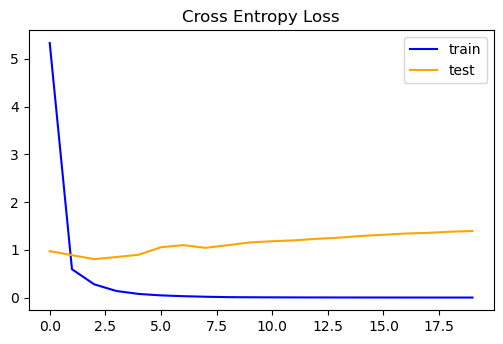

In [54]:

#PLot the history of cross entropy loss
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],
         color='blue',
         label='train')
plt.plot(history.history['val_loss'],
         color='orange',
         label='test')
plt.legend()


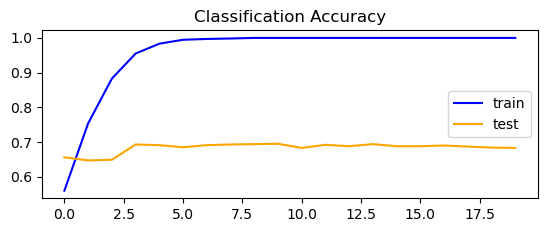

In [55]:
#PLot the history of accuracy
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],
         color='blue',
         label='train')
plt.plot(history.history['val_accuracy'],
         color='orange',
         label='test')

plt.legend()
